# Classification of Images from Cifar-10 dataset with a VGG based Convolution Neural Network

This project showcases a Convolutional Neural Network based architecture to classify images from the Cifar-10 dataset.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes. There are 50000 training images and 10000 test images." -( https://www.cs.toronto.edu/~kriz/cifar.html ).

The 10 classes are:
1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

I have designed an architecture adapted from the VGG16 model [Very Deep Convolutional Networks for Large-Scale Image Recognition (ICLR 2015)[1]](https://arxiv.org/abs/1409.1556), and changed the last 2 layers and added regurization techniques inspired from [Very deep convolutional neural network based image classification using small training sample size [2]](https://ieeexplore.ieee.org/document/7486599).

The VGG 16 architecture [1] is built for ImageNet, a much larger dataset with 1000 classes and if used directly on Cifar-10, will lead to overfitting.

So the second paper showcases the use of strong regularization to adapt to smaller datasets like Cifar-10





The usual configuration of VGG architectures uses stacks of 3 X 3 filters as the basic building block.

The VGG 16 architecture consists of 
1. 2 3 X 3 filters with a depth of 64, Relu activation
2. max pool layer of size 2 X 2
3. 2 3 X 3 filters with a depth of 128, Relu activation
4. max pool layer
5. 3 3 X 3 filters of depth 256, Relu activation
6. max pool layer
7. 3 3 X 3 filters of depth 256, Relu activation
8. max pool layer
9. 3 3 X 3 filters of depth 512, Relu activation
10. max pool layer
11. 3 3 X 3 filters of depth 512, Relu activation 
12. max pool layer
13. 2 Dense layers of 4096 neurons each, Relu activation
14. A final dense layer of 1000 classes which acts as the classification layer, softmax activation

Based on [2] the architecture for Cifar-10 has been modified with batch normalization after each layer, multiple dropout layers with droupout percentages going upto 50 percent before the final layer. The final layer has been modified to accomodate 10 classes, and the 2 dense layers have been replaced with a single dense layer with 512 neurons.

We start with importing the necessary keras layers and numpy. We download the cifar10 dataset which is a part of the keras datasets, and load the data to show its dimensions.

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 11 14:45:48 2022

@author: pramitchatterjee
"""

from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import regularizers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## We now define a class to house the design of our model, and the functions to train it.

We use the imagedatagenerator from keras for data augmentation, so that there is less overfitting.
We train the model for 250 epochs, with a learning rate that drops every 25 epochs using keras callback.
We also save the best model based on validation loss. We use Stochastic Gradient Descent and categorical_crossentropy to train the model.

In [13]:
class Cifar10:
    def __init__(self,train=True):
        self.num_classes= num_classes
        self.x_shape = [32,32,3]
        self.weight_decay = 0.0005
        self.model = self.buildModel()
        if train:
            self.model = self.train(self.model)
        else:
            self.model.load_weights('Past_Training_A.h5')
    
    def buildModel(self):
        model = Sequential()
        
        model.add(Conv2D(64,(3,3),padding = 'same',input_shape=self.x_shape,
                           kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(64,(3,3),padding = 'same',input_shape=self.x_shape,
                           kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        
        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        
        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        
        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))
        
        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Flatten())
        
        model.add(Dense(512,kernel_regularizer=regularizers.l2(self.weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        model.add(Dropout(0.5))
        
        model.add(Dense(self.num_classes))
        model.add(Activation('softmax'))
        
        print(model.summary())
        return model
    
    def normalize(self,X_train,X_test):
        #trianing set normalization
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test
        
    def normalize_in_Val(self,x):
        #normalization for test set
        mean = 120.707
        std = 64.15
        return (x-mean)/(std+1e-7)
        
    def predict(self,x,normalize=True,batch_size=50):
        if normalize:
            x = self.normalize_in_Val(x)
        return self.model.predict(x,batch_size)
        
    def train(self,model):
        batch_size = 128
        maxepoches = 250
        learning_rate = 0.1
        lr_decay = 1e-6
        lr_drop = 25
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train, x_test = self.normalize(x_train, x_test)

        y_train = keras.utils.to_categorical(y_train, self.num_classes)
        y_test = keras.utils.to_categorical(y_test, self.num_classes)

        def lr_scheduler(epoch):
            lrate = learning_rate * 0.5**((1+epoch)//lr_drop)
            print(lrate)
            return lrate
        reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)
        
        checkpoint = keras.callbacks.ModelCheckpoint(filepath='Past_Training_A.h5', 
                                     monitor='val_loss',
                                     verbose=1, 
                                     save_best_only=True,
                                     mode='min')
        callbacks = [checkpoint,reduce_lr]
        
        ImgGen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)
        ImgGen.fit(x_train)
        
        sgd = keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

        self.history = model.fit(ImgGen.flow(x_train, y_train),
                                         batch_size=batch_size,
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=maxepoches,
                            validation_data=(x_test, y_test),callbacks=callbacks)
        return model

 Function to show the graphs for accuracy and loss for training and validation

In [7]:
import matplotlib.pyplot as plt
def plotAccLoss(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('CNN accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('CNN loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

We now create an object of this class so that the constructor initializes the training

In [14]:
modelA = Cifar10()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_47 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_33 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_48 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 32, 32, 64)       

The least validation loss(0.58024) was observed on the 250th epoch, which means that further training may improve the model. The validation accuracy for this epoch was 90.27 percent.

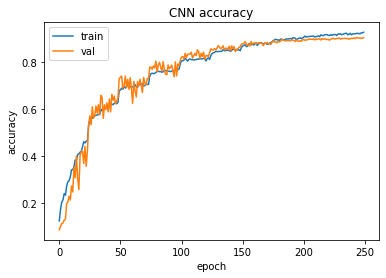

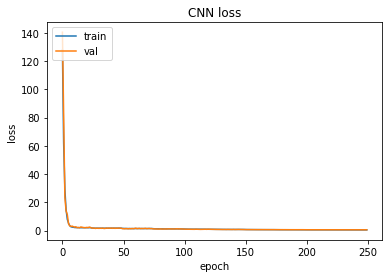

In [16]:
plotAccLoss(modelA.history)

Both the accuracy and loss were close to each other throught the epochs, and this shows that the model was not overfitting throughout the process. The trends also show that more epochs will help improve the statistics. 